In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Ge the data ready for machine learning


### Cleaning Data -> Transform Data -> Reduce Data

### Clean Data
- provide good data - garbage in garbage out
- remove row or column with empty and missing fields
- fill empty will average price
- remove outliers

### Data Transformation to make it workable to machine learning
- computer understand numbers
- color convert to rgb
- convert category into numbers

### Reduce data
- More data is better for training but it also cause computing power
- If we can get the same result with less data, we can save money

### Tree main things we have to do:
- Split the data into features and labels (usally "X" & "y")
- Fill (also called imputing) or remove missing values
- Convert non-numerical values to numerical values (also called feature encoding)



In [74]:
heart_disease = pd.read_csv("heart-disease.csv")

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape



((242, 13), (61, 13), (242,), (61,))

In [75]:
# 1.1) Make sure data are in numerical form

car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

# Turn categories into numbers (Make, Color, Doors)
# Although Door is a number, we can represent a simpler number to represent its category
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

# 1.1 - Method-1
# OneHotEncoder() converts each category into a binary vector
# ColumnTransformer lets you apply different transformations to different columns of your dataset

# Columns to encode
categorical_features = ["Make", "Colour", "Doors"]

# Column transformer
transformer = ColumnTransformer(
    transformers=[("onehot", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

# remainder="passthrough" → keep all other columns as they are (no transformation).

# Apply transformation
transform_X = transformer.fit_transform(X)



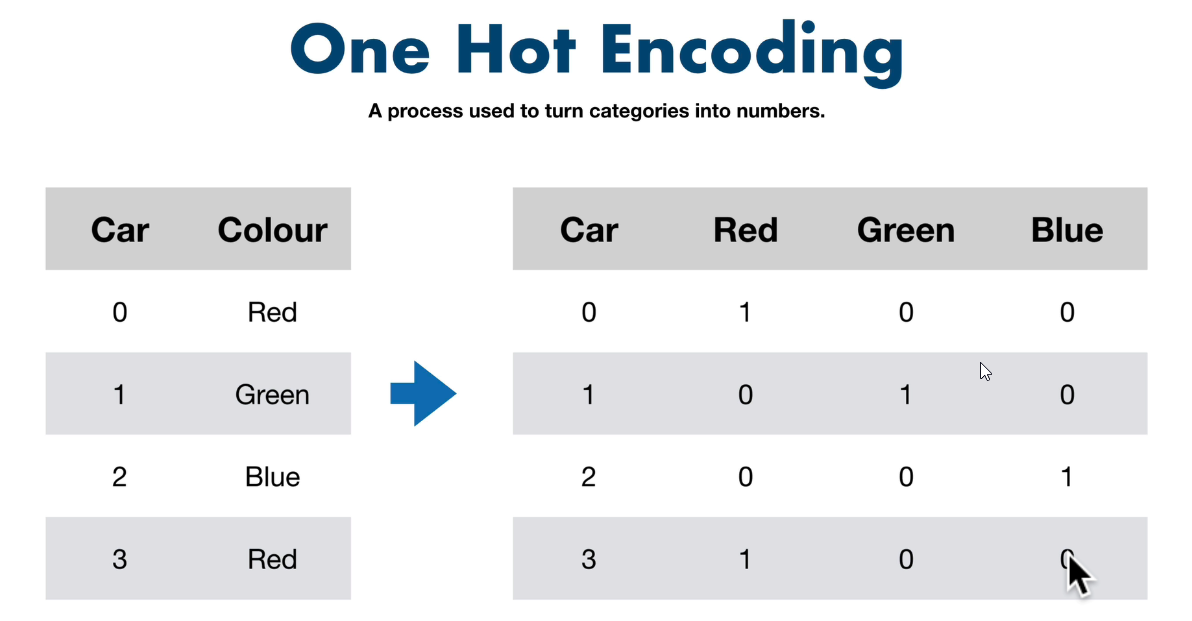

In [76]:
#2 Method 2 - use pandas dummies
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]]).astype(int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [77]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.2)

In [78]:
# 2) Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

result = model.score(X_test, y_test)
result

0.3235867221569877

In [79]:
## Deal with missing data

# 1) Fill them with some values (also known as imputation)
# 2) Remove the samples with missing data

car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

# 1.1 - Method-1
# OneHotEncoder() converts each category into a binary vector
# ColumnTransformer lets you apply different transformations to different columns of your dataset

# Columns to encode
categorical_features = ["Make", "Colour", "Doors"]

# Column transformer
transformer = ColumnTransformer(
    transformers=[("onehot", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

# remainder="passthrough" → keep all other columns as they are (no transformation).

# Apply transformation
transform_X = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.2)
model = RandomForestRegressor()

result = model.score(X_test, y_test)
result

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.